In [0]:

import statistics
import pandas as pd
import numpy as np

In [0]:

df = spark.read.option("header",True).csv("dbfs:/FileStore/tables/ProjectDataset.csv")
#df.head(2)

In [0]:
dataset =  {}
selectedCountryName = ['Sudan','Senegal','Singapore','Solomon Island','Sierra Leone']
counter = 0
for country in selectedCountryName:
   
    dataset[country] = df.collect()[counter][4:]
    counter += 1

In [0]:
print(dataset) 

{'Sudan': (None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '2.868273605', '7.234613021', '10.0273284', '10.63455835', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None), 'Senegal': ('0.906059557', '0.922473917', '0.930815894', '0.940569529', '0.996033447', '1.047279743', '1.033908319', '1.052204052', '1.079726652', '1.104631605', '1.123261243', '1.219593048', '1.209262779', '1.204522542', '1.186045209', '1.181139367', '1.190203366', '1.182217743', '1.169157603', '1.216900549', '1.235910896', '1.319763789', '1.367396551', '1.386366901', '1.431963637', '1.423144569', '1.4207769', '1.390141636', '1.407205363', '1.357143612', '1.017504843', '0.971323798', '0.931920141', '0.925464632', '0.918611814', '0.946474948', '0.951132322', '0.971562628', '0.9696

In [0]:
dataset = pd.DataFrame(dataset,index=year)
dataset = dataset.T
dataset.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Sudan,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Senegal,0.906059557,0.922473917,0.930815894,0.940569529,0.996033447,1.047279743,1.033908319,1.052204052,1.079726652,1.104631605,...,1.00533811,1.021646329,1.031833091,1.041144792,0.987393167,0.971016455,0.959978017,0.933541201,None,None
Singapore,0.046056743,0.053588858,0.073720823,0.074160764,0.086173694,0.101284933,0.107398839,0.123409413,0.115142487,0.086509888,...,0.407073503,0.335351023,0.263715761,0.234036914,0.232175631,0.208857196,0.203327569,0.200151071,None,None
Solomon Island,0.090879548,0.095282835,0.096612374,0.112376069,0.133258462,0.184802797,0.193675909,0.189305086,0.143988572,0.20212888,...,0.497022584,0.490866787,0.504655299,0.507671121,0.480743071,0.472959364,0.476437769,0.515544239,None,None
Sierra Leone,0.100835243,0.082204109,0.210532979,0.202739053,0.213562174,0.205890819,0.268937204,0.172095822,0.289701979,0.480199019,...,1.216316979,1.204798883,1.261541742,1.285364553,1.260920989,1.227702942,1.0343173,0.887380364,None,None


In [0]:
header = df.columns
header = header[4:]
year = []
for head in header:
    year.append(int(head))
print(year)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [0]:
dataset = np.array(dataset)

In [0]:
max = [0]*numberOfCountry
avg = [0]*numberOfCountry
sum = 0
cnt = 0
for i in range(numberOfCountry):
    for data in dataset[i]:
        if data is not None :
            sum += float(data)
            cnt += 1
            if max[i] < float(data):
                max[i] = float(data)
    avg[i] = sum/cnt
    sum = 0
    cnt = 0
                
print(max)
print(avg)

[0.513960335, 0.661619418, 15.15570254, 0.723530488, 0.411174362]
[0.30611476083050837, 0.41933211616949156, 8.851546589152546, 0.46770393394915266, 0.1408098488813559]


In [0]:
#data preprocessing
#finalDataset = [[float(x) if x is not None else max[i] for x in dataset[i]] for i in range(numberOfCountry)]
finalDataset = [[float(x) if x is not None else avg[i] for x in dataset[i]] for i in range(numberOfCountry)]
print(finalDataset)

[[0.18032439, 0.178406649, 0.185546272, 0.203603231, 0.218623166, 0.276799086, 0.292215359, 0.341265619, 0.322199027, 0.420320901, 0.472208911, 0.469186707, 0.490175155, 0.478420032, 0.484434572, 0.349061868, 0.298528318, 0.292017933, 0.254591916, 0.255076487, 0.258327264, 0.24231513, 0.24600413, 0.242681644, 0.210449109, 0.236722482, 0.239338558, 0.183115296, 0.256937, 0.19298362, 0.266533092, 0.229759152, 0.208791938, 0.141602587, 0.199670372, 0.185517661, 0.171896295, 0.204218855, 0.18104579, 0.194542943, 0.203482901, 0.217724902, 0.262673967, 0.263063951, 0.281655748, 0.325045492, 0.39290219, 0.414701585, 0.438887767, 0.443408063, 0.459400595, 0.434233117, 0.420237941, 0.391124917, 0.403658393, 0.457548873, 0.513960335, 0.498365757, 0.483235878, 0.30611476083050837, 0.30611476083050837], [0.258436171, 0.247042436, 0.240366505, 0.247510235, 0.258106647, 0.460008053, 0.453853281, 0.179605185, -0.020097621, 0.118882043, 0.307484801, 0.308401853, 0.32187391, 0.332811026, 0.386025105, 0

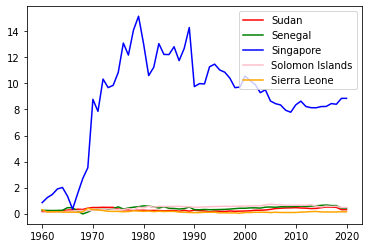

In [0]:
color = ['red','green','blue','pink','orange']
import matplotlib.pyplot as plt
for i in range(numberOfCountry):
    plt.plot(year,finalDataset[i],color = color[i])
plt.legend(selectedCountryName)
plt.show()

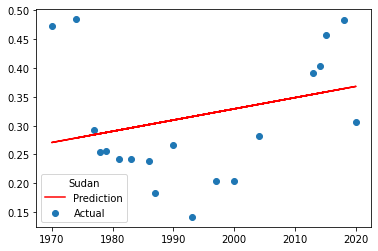

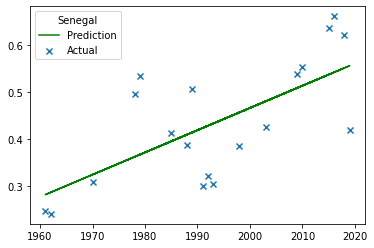

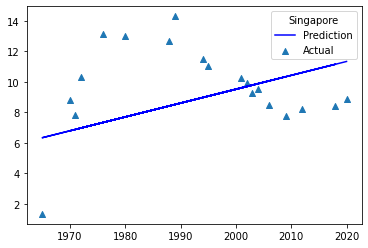

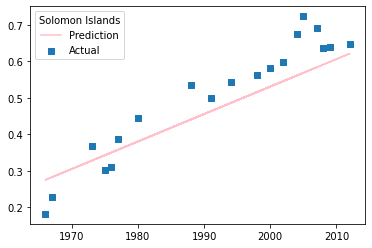

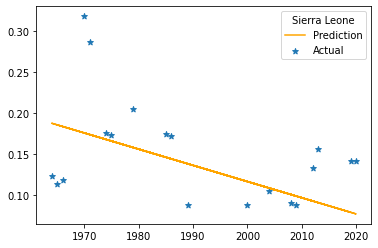

In [0]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
lrPred = []
marker = ['o','x','^','s','*']
TheYear = np.array(2025).reshape(-1,1)

for i in range(numberOfCountry):
    x_train,x_test,y_train,y_test = tts(year,finalDataset[i],test_size = 0.3)
    #y_train = finalDataset[i][:-6]
    #y_test = finalDataset[i][-6:]
    #x_train = year[:-6]
    #x_test = year[-6:]
    x_train= np.array(x_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    sol = lr().fit(x_train,y_train)
    prediction = sol.predict(x_test)
    lrPred.append(sol.predict(TheYear))
    plt.plot(x_test,prediction,color = color[i])
    plt.scatter(x_test,y_test,marker = marker[i])
    plt.legend(['Prediction' , 'Actual'],title = selectedCountryName[i])
    plt.show()

In [0]:
lrPred = np.array(lrPred).reshape(numberOfCountry) #reshaping to print data in readable format
print('Prediction for the year 2025, in the following country is(are) : ')
for i in range(numberOfCountry):
    print(selectedCountryName[i] , 'is' , lrPred[i])

Prediction for the year 2025, in the following country is(are) : 
Sudan is 0.37775625478283903
Senegal is 0.5846866889112956
Singapore is 11.78292177369093
Solomon Islands is 0.7189288162089884
Sierra Leone is 0.06662322547679


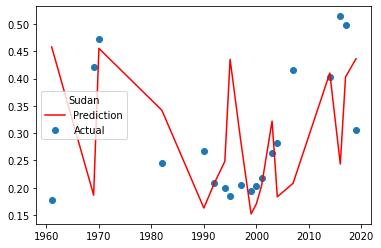

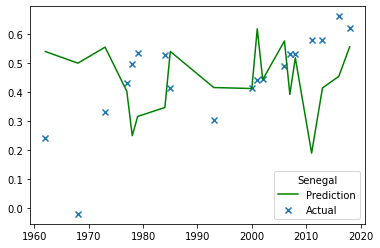

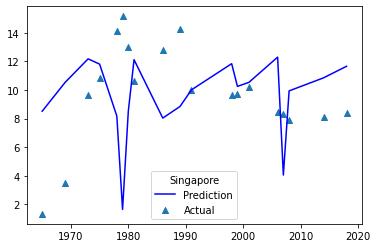

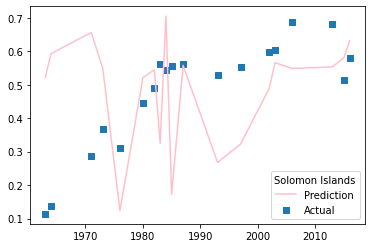

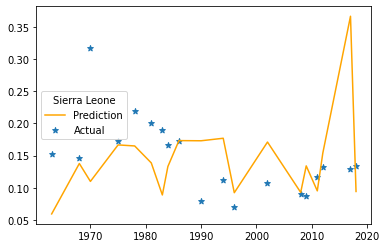

In [0]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
rfrPred = []
for i in range(numberOfCountry):
    x_train,x_test,y_train,y_test = tts(year,finalDataset[i],test_size = 0.3)
    x_train= np.array(x_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    sol = rfr(n_estimators = 100).fit(x_train,y_train.ravel())
    prediction = sol.predict(x_test)
    rfrPred.append(sol.predict(TheYear))
    plt.plot(sorted(x_test),prediction,color = color[i])
    plt.scatter(x_test,y_test,marker = marker[i])
    plt.legend(['Prediction' , 'Actual'],title = selectedCountryName[i])
    plt.show()

In [0]:
rfrPred = np.array(rfrPred).reshape(numberOfCountry) #reshaping to print data in readable format
print('Prediction for the year 2025, in the following country is(are) : ')
for i in range(numberOfCountry):
    print(selectedCountryName[i] , 'is' , rfrPred[i])

Prediction for the year 2025, in the following country is(are) : 
Sudan is 0.3589648590847455
Senegal is 0.43946231647254275
Singapore is 8.797187830552721
Solomon Islands is 0.48494426590779693
Sierra Leone is 0.13992910136203376


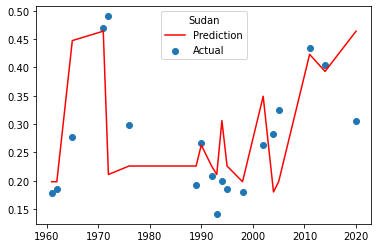

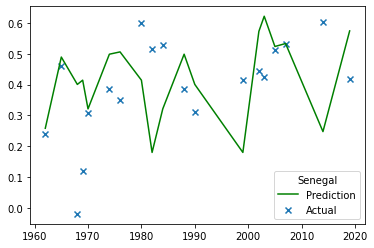

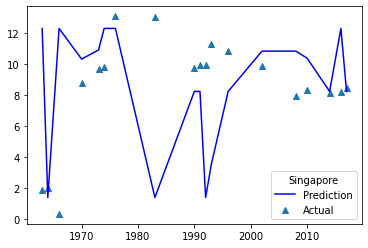

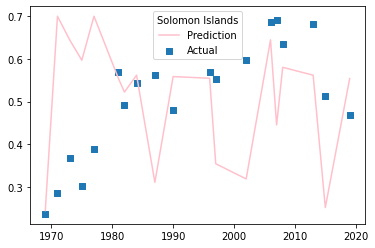

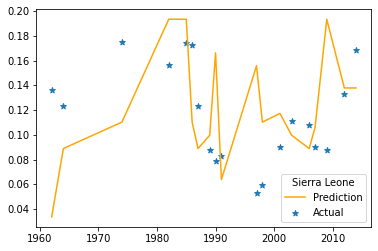

In [0]:
from sklearn.tree import DecisionTreeRegressor as dtr
dtrPred = []
for i in range(numberOfCountry):
    x_train,x_test,y_train,y_test = tts(year,finalDataset[i],test_size = 0.3)
    x_train= np.array(x_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    sol = dtr(max_depth = 5).fit(x_train,y_train)
    prediction = sol.predict(x_test)
    dtrPred.append(sol.predict(TheYear))
    plt.plot(sorted(x_test),prediction,color = color[i])
    plt.scatter(x_test,y_test,marker = marker[i])
    plt.legend(['Prediction' , 'Actual'],title = selectedCountryName[i])
    plt.show()

In [0]:
dtrPred = np.array(dtrPred).reshape(numberOfCountry) #reshaping to print data in readable format
print('Prediction for the year 2025, in the following country is(are) : ')
for i in range(numberOfCountry):
    print(selectedCountryName[i] , 'is' , dtrPred[i])

Prediction for the year 2025, in the following country is(are) : 
Sudan is 0.30611476083050837
Senegal is 0.41933211616949156
Singapore is 8.851546589152546
Solomon Islands is 0.46770393394915266
Sierra Leone is 0.1408098488813559


In [0]:
result = {}
for i in range(numberOfCountry):
    result[selectedCountryName[i]] = [lrPred[i],rfrPred[i],dtrPred[i]]
result = pd.DataFrame(result,index = pd.Index(['Linear Regression','Random Forest Regressor','Decision Tree Regressor']))
result

,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone
Linear Regression,0.377756,0.584687,11.782922,0.718929,0.066623
Random Forest Regressor,0.358965,0.439462,8.797188,0.484944,0.139929
Decision Tree Regressor,0.306115,0.419332,8.851547,0.467704,0.140810
